# 📘 Interpolacion de Lagrange

## ✍️ Idea:
Construir un polinomio que pase por todos los puntos

Cada termino contribuye con solo un "punto"

## 🔢 Formula:

$$
P(x) = \sum_{i=0}^{n} y_i \cdot L_i(x)
\quad\text{donde}\quad
L_i(x) = \prod_{\substack{j=0 \\ j \ne i}}^{n} \frac{x - x_j}{x_i - x_j}
$$

Cada $ L_i(x) $ es una base que aisla la contribucion a $y_i$.

## 🧠 Intuicion:

> "Cada base se comporta como un delta"

## 🧮 Algoritmo:
1. Para cada punto $(x_i, y_i)$, construir la base $L_i(x)$.
2. Multiplicar cada base $L_i(x)$ por $y_i$.
3. Sumar los terminos y obtener el polinomio.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Funcion

In [2]:
def interp_lagrange(x_p, y_p):
    """
    Crea una funcion que implementa el polinomio interpolante de Lagrange.

    Args:
        x_p (lista): x datos.
        y_p (lista): y datos.

    Retorna:
        funcion polinomial.
    """
    # verificar tienen la misma longitud
    if len(x_p) != len(y_p):
        raise ValueError("Las lista no tienen la misma longitud")

    # Polinomio P(x)
    def P(x):
        total = 0
        n = len(x_p)
        for j in range(n):
            # L_j(x) = producto((x - x_i) / (x_j - x_i)) for i != j
            L_j = 1.0
            for i in range(n):
                if i != j:
                    if x_p[j] == x_p[i]:
                        raise ValueError("x repetido")
                    L_j *= (x - x_p[i]) / (x_p[j] - x_p[i])

            # Sumar todos los terminos
            total += y_p[j] * L_j
        return total

    return P

## Ejemplo

In [3]:
x_p = np.array([0, 1, 3, 4, 5])
y_p = np.array([-1, 2, 0, 5, 6.5])

polinomio_lagrange = interp_lagrange(x_p, y_p)

x_nuevo = 1.5
y_nuevo = polinomio_lagrange(x_nuevo)

print(f"Interpolacion en x = {x_nuevo} es y = {y_nuevo}")

Interpolacion en x = 1.5 es y = 0.56640625


## scipy.interpolate

In [5]:
from scipy.interpolate import lagrange
poly_lagrange = lagrange(x_p, y_p)
print(poly_lagrange(x_nuevo))

0.5664062500000036


In [6]:
poly_lagrange.c

array([ -0.35416667,   3.66666667, -11.39583333,  11.08333333,
        -1.        ])

In [7]:
print(np.poly1d(poly_lagrange))

         4         3        2
-0.3542 x + 3.667 x - 11.4 x + 11.08 x - 1


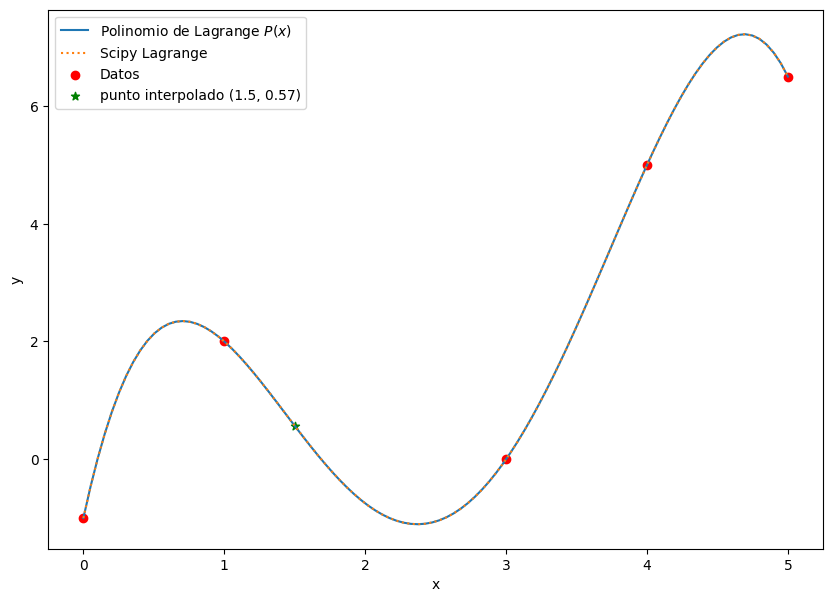

In [8]:
x_range = np.linspace(min(x_p), max(x_p), 100)
y_range = [polinomio_lagrange(x) for x in x_range]

plt.figure(figsize=(10, 7))
plt.plot(x_range, y_range, label=r'Polinomio de Lagrange $P(x)$')
plt.plot(x_range, poly_lagrange(x_range), ':', label='Scipy Lagrange')
plt.scatter(x_p, y_p, color='r', label='Datos')
plt.scatter(x_nuevo, y_nuevo, color='green', marker='*', label=f'punto interpolado ({x_nuevo}, {y_nuevo:.2f})')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Ejercicio
1. Comparar los dos metodos. Hallar el error.

In [9]:
from scipy.interpolate import interp1d

In [10]:
interp_simple = interp1d(x_p, y_p)

In [11]:
x_nuevo = 1.5
y_lagrange1 = polinomio_lagrange(x_nuevo)
y_interp1d = interp_simple(x_nuevo)
print(y_lagrange1, y_interp1d)

0.56640625 1.5
